# Project - Visualization Using Matplotlib - Loan_Prediction

In [1]:
# Path for the Dataset

path = "c:/users/kruti karia/desktop/loan_prediction.csv"

In [2]:
# Import Package/Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data from the path and read the data

data = pd.read_csv(path)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Data Attributes

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            600 non-null    object 
 1   Gender             589 non-null    object 
 2   Married            597 non-null    object 
 3   Dependents         585 non-null    object 
 4   Education          600 non-null    object 
 5   Self_Employed      570 non-null    object 
 6   ApplicantIncome    600 non-null    int64  
 7   CoapplicantIncome  600 non-null    float64
 8   LoanAmount         578 non-null    float64
 9   Loan_Amount_Term   586 non-null    float64
 10  Credit_History     551 non-null    float64
 11  Property_Area      600 non-null    object 
 12  Loan_Status        600 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.1+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,600.000000,600.000000,578.000000,586.000000,551.000000
mean,4870.668333,1421.538200,141.865052,342.593857,0.843920
std,3380.099718,1684.082008,76.311156,64.797084,0.363261
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2880.500000,0.000000,100.000000,360.000000,1.000000
50%,3768.500000,1188.500000,126.500000,360.000000,1.000000
75%,5704.250000,2253.250000,163.500000,360.000000,1.000000
max,20833.000000,8980.000000,650.000000,480.000000,1.000000


In [7]:
# Check for null values if any

data.isnull().sum()

Loan_ID               0
Gender               11
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Calulate value count for Loan Status

loan_status = data['Loan_Status'].value_counts()
print(loan_status)

Y    415
N    185
Name: Loan_Status, dtype: int64


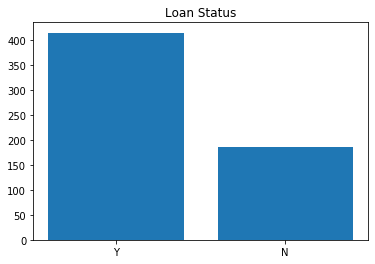

In [12]:
# Plot a bar graph for Loan Status

plt.bar(loan_status.index,loan_status)
plt.title("Loan Status")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          68  109
Semiurban      51  175
Urban          66  131


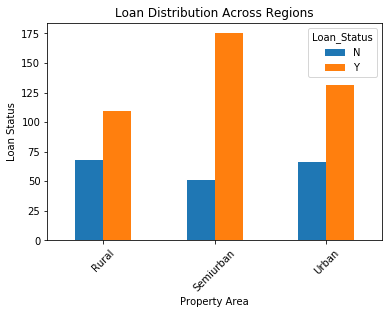

In [19]:
# Plot Bar Chart to observe Loan Distribution across different Regions

# Calculate Loan Distribution across Regions

property_and_loan = data.groupby(['Property_Area','Loan_Status']).size().unstack()
print(property_and_loan)

# Plot Stacked Bar Chart

property_and_loan.plot(kind = 'bar',stacked = False)
plt.xticks(rotation = 45)
plt.title("Loan Distribution Across Regions")
plt.xlabel("Property Area")
plt.ylabel("Loan Status")
plt.show()


Loan_Status     N    Y
Education             
Graduate      133  333
Not Graduate   52   82


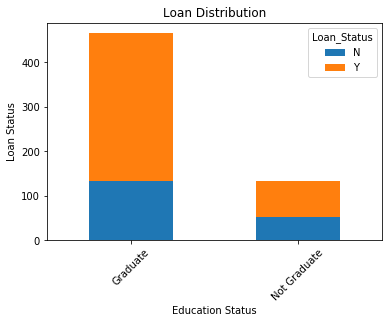

In [24]:
# Plot a Stacked Bar Chart to observe Loan Distribution according to Education

# Calculate Loan Distribution with Education

education_and_loan = data.groupby(['Education','Loan_Status']).size().unstack()
print(education_and_loan)

# Plot Stacked Bar Chart

education_and_loan.plot(kind = 'bar',stacked = True)
plt.xticks(rotation = 45)
plt.title("Loan Distribution")
plt.xlabel("Education Status")
plt.ylabel("Loan Status")
plt.show()

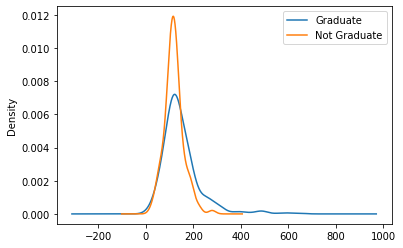

In [36]:
# Density Plot to check Loan Distribution according to Graduate/or Not

# Subset the Dataframe

graduate = data[data['Education']=='Graduate']

not_graduate = data[data['Education']=='Not Graduate']

# Density Plot

graduate['LoanAmount'].plot(kind='density', label='Graduate')

not_graduate['LoanAmount'].plot(kind='density',label='Not Graduate')

plt.legend()

plt.show()


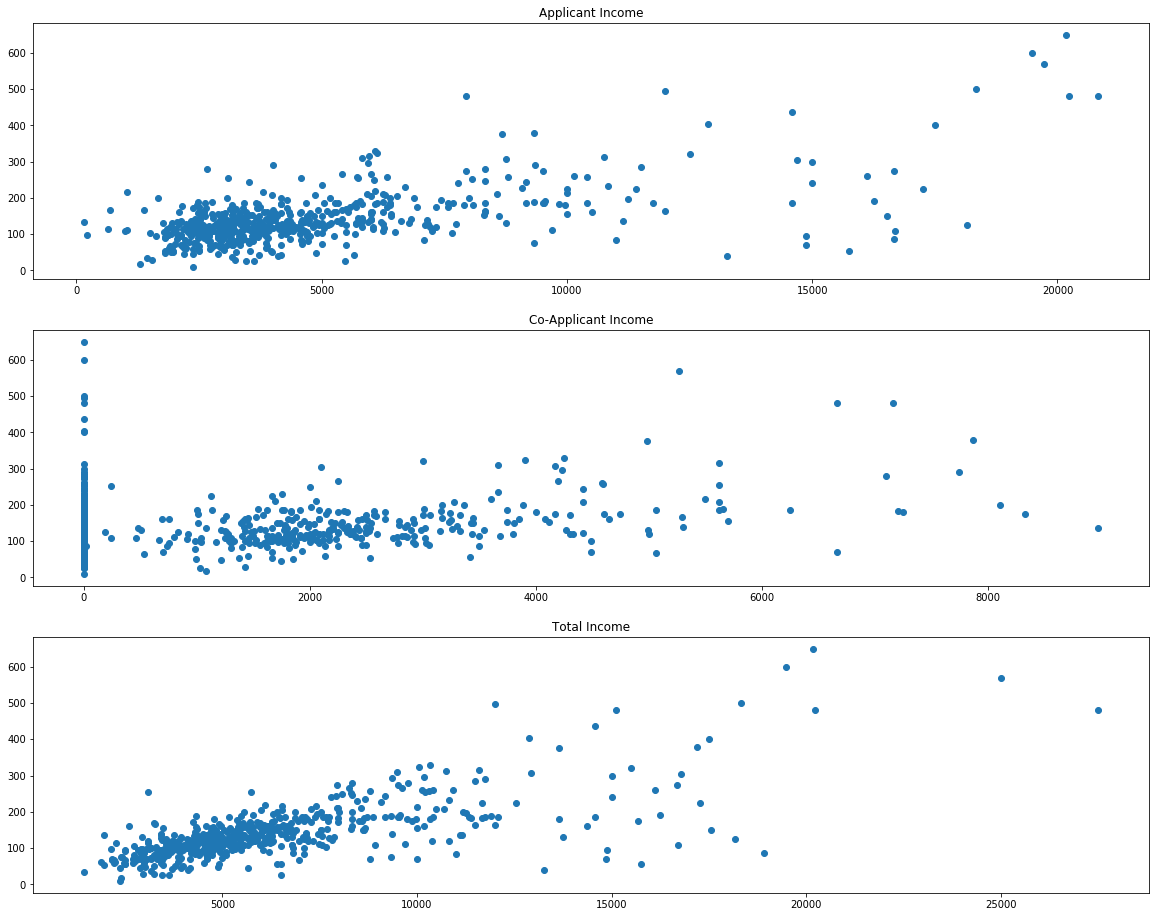

In [47]:
# Plot Scatter Plots to check Relaton between Borrower's Income and Loan Amount

# New Column "Total Income" to be created 

data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Plot Scatter Subplots for AppplicantIncome, Co-applicantIncome and TotalIncome against Loan Amount

# Intialize the figure

fig, (ax_1, ax_2, ax_3) = plt.subplots(3,1, figsize=(20,16))

# Scatterplot for ApplicantIncome vs Loan Amount

ax_1.scatter(data['ApplicantIncome'],data['LoanAmount'])
ax_1.set(title = "Applicant Income")

# Scatterplot for Co-applicantIncome vs Loan Amount

ax_2.scatter(data['CoapplicantIncome'],data['LoanAmount'])
ax_2.set(title = "Co-Applicant Income")

# Scatterplot for Totalincome vs Loan Amount

ax_3.scatter(data['TotalIncome'],data['LoanAmount'])
ax_3.set(title = "Total Income")

plt.show()